In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


df=pd.read_csv('/kaggle/input/college-placement/placement-dataset.csv')
df.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [39]:
df = df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [40]:
df.shape

(100, 3)

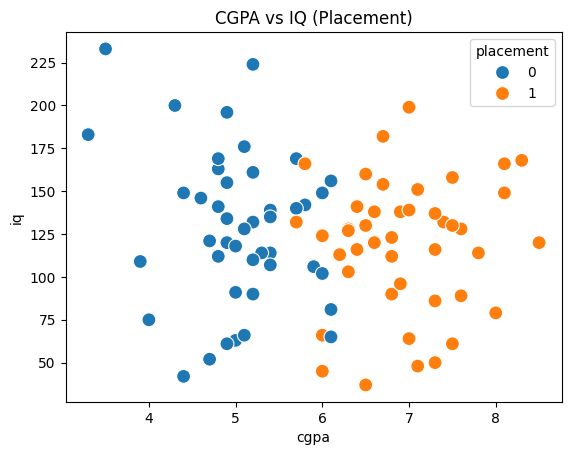

In [41]:
sns.scatterplot(
    x='cgpa',
    y='iq',
    hue='placement',
    data=df,
    s=100
)

plt.title("CGPA vs IQ (Placement)")
plt.show()

In [42]:
X = df[['cgpa', 'iq']].values
y = df['placement'].values

In [43]:
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('perceptron', Perceptron(max_iter=1000, eta0=0.1, random_state=42))
])

In [44]:
pipe.fit(X, y)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('perceptron', Perceptron(eta0=0.1, random_state=42))])

In [45]:
w = pipe.named_steps['perceptron'].coef_
b = pipe.named_steps['perceptron'].intercept_

print("Weights:", w)
print("Bias:", b)

Weights: [[0.52036755 0.12666127]]
Bias: [0.]


In [51]:
# Wrapper for mlxtend
class PipelineWrapper:
    def __init__(self, pipeline):
        self.pipeline = pipeline

    def predict(self, X):
        return self.pipeline.predict(X)

In [47]:
from mlxtend.plotting import plot_decision_regions

In [54]:
X_plot = pipe.named_steps['imputer'].transform(X)

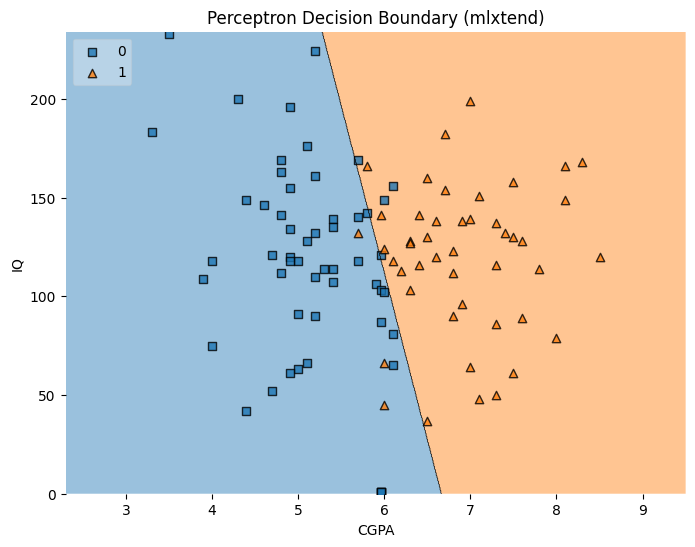

In [55]:
# Plot decision regions
plt.figure(figsize=(8, 6))

plot_decision_regions(
    X=X_plot,
    y=y,
    clf=PipelineWrapper(pipe),
    legend=2
)

plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Perceptron Decision Boundary (mlxtend)")
plt.show()

In [57]:
new_student = [[6.5, 125]]   # shape: (1, 2)

In [59]:
prediction = pipe.predict(new_student)
if prediction[0] == 1:
    print("Placement: YES")
else:
    print("Placement: NO")

Placement: YES


In [60]:
score = pipe.decision_function(new_student)
print("Decision score:", score)

Decision score: [0.27004384]
